### 과제
- 데이터셋: iris.csv => 100개 데이터셋 : 2진분류
- KNN 알고리즘 사용
- 품종 분류
- 학습용, 테스트용 데이터셋 분리
- 테스트용 데이터셋으로 검증까지


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
file_path = r'C:\baekjoon-solutions\연습\iris.csv'

In [102]:
irisDF=pd.read_csv(file_path,usecols=[0,1,4])
irisDF.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


In [103]:
irisDF2 = irisDF.iloc[:100, ]

In [104]:
irisDF2

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
95,5.7,3.0,Versicolor
96,5.7,2.9,Versicolor
97,6.2,2.9,Versicolor
98,5.1,2.5,Versicolor


In [105]:
names = irisDF2['variety'].unique().tolist()
irisDF2['Code'] = irisDF2.loc[:, 'variety'].replace({name: idx for idx, name in enumerate(names, 1)})


C:\Users\user\AppData\Local\Temp\ipykernel_5396\83749258.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  irisDF2['Code'] = irisDF2.loc[:, 'variety'].replace({name: idx for idx, name in enumerate(names, 1)})
C:\Users\user\AppData\Local\Temp\ipykernel_5396\83749258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irisDF2['Code'] = irisDF2.loc[:, 'variety'].replace({name: idx for idx, name in enumerate(names, 1)})


In [106]:
irisDF2

,sepal.length,sepal.width,variety,Code
0,5.1,3.5,Setosa,1
1,4.9,3.0,Setosa,1
2,4.7,3.2,Setosa,1
3,4.6,3.1,Setosa,1
4,5.0,3.6,Setosa,1
...,...,...,...,...
95,5.7,3.0,Versicolor,2
96,5.7,2.9,Versicolor,2
97,6.2,2.9,Versicolor,2
98,5.1,2.5,Versicolor,2


[2] 피쳐와 타겟 분리

In [107]:
features=irisDF2[['sepal.length', 'sepal.width']]
target = irisDF2['Code']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'feature => {target.shape}, {target.ndim}D')

feature => (100, 2), 2D
feature => (100,), 1D


[3] 데이터셋 준비 => 학습용,테스트용

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=10)

In [110]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (80, 2), 2D
y_train : (80,), 1D
X_test : (20, 2), 2D
y_test : (20,), 1D


In [111]:

y_train.value_counts(), y_train.shape

(Code
 2    40
 1    40
 Name: count, dtype: int64,
 (80,))

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [114]:
# 학습
model.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
# 학습 후 모델의 파라미터확인
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([1, 2]), array(['sepal.length', 'sepal.width'], dtype=object), 80)

[5] 성능평가 => score() 


In [116]:
model.score(X_test, y_test)

1.0

[6] 예측하기

In [117]:
new_data = pd.DataFrame([[5.7, 2.6]], columns=model.feature_names_in_)

In [118]:
new_data

,sepal.length,sepal.width
0,5.7,2.6


In [119]:
model.predict(new_data)[0]

np.int64(2)

In [120]:
## 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data)

In [121]:
distance

array([[0.        , 0.1       , 0.14142136, 0.14142136, 0.2       ]])

In [122]:
index

array([[48, 56, 50, 12,  9]])

In [123]:
neighbors = index.reshape(-1).tolist()

In [124]:
irisDF2.iloc[neighbors]

,sepal.length,sepal.width,variety,Code
48,5.3,3.7,Setosa,1
56,6.3,3.3,Versicolor,2
50,7.0,3.2,Versicolor,2
12,4.8,3.0,Setosa,1
9,4.9,3.1,Setosa,1


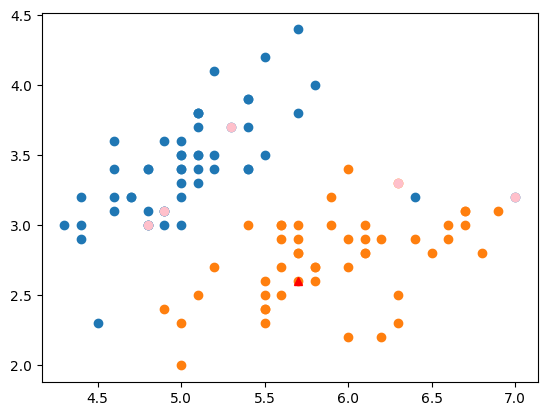

In [125]:
## 시각화
plt.scatter(irisDF2.loc[:51, 'sepal.length'], irisDF2.loc[:51, 'sepal.width'])
plt.scatter(irisDF2.loc[52:, 'sepal.length'], irisDF2.loc[52:, 'sepal.width'])
plt.plot(new_data['sepal.length'], new_data['sepal.width'], 'r^')
plt.scatter(irisDF2.iloc[neighbors]['sepal.length'], irisDF2.iloc[neighbors]['sepal.width'], color = 'pink')
plt.show()

## 피쳐 스케일링

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [128]:
mmScaler.fit(X_train)

MinMaxScaler()

In [129]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-1.59259259, -0.90909091]),
 array([4.3, 2. ]),
 array([0.37037037, 0.45454545]),
 array([7. , 4.2]))

In [130]:
X_train.min(), X_train.max()

(sepal.length    4.3
 sepal.width     2.0
 dtype: float64,
 sepal.length    7.0
 sepal.width     4.2
 dtype: float64)

In [131]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape

(80, 2)

In [132]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_scaled=mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((20, 2), np.float64(0.037037037037037424), np.float64(1.0909090909090908))

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
# 인스턴스 생성
scaled_model = KNeighborsClassifier()

In [135]:
scaled_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [136]:
# 학습 후 모델 파라미터
scaled_model.classes_, scaled_model.n_samples_fit_

(array([1, 2]), 80)

In [137]:
scaled_model.score(X_test_scaled, y_test)

1.0

In [138]:
mmScaler.data_range_, mmScaler.transform(new_data)

(array([2.7, 2.2]), array([[0.51851852, 0.27272727]]))

In [139]:
new_iris_scaled= mmScaler.transform(new_data)
new_iris_scaled

array([[0.51851852, 0.27272727]])

In [140]:
scaled_model.predict(new_data)

c:\새 폴더\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([2])

In [141]:
### 최근접한 k개 데이터 찾기
scaled_distance, scaled_index = scaled_model.kneighbors(new_iris_scaled)

In [142]:
scaled_distance, scaled_index

(array([[0.        , 0.03703704, 0.05863325, 0.05863325, 0.08690848]]),
 array([[48, 56, 50, 12, 71]]))

In [143]:
neighbors = scaled_index.reshape(-1).tolist()

In [145]:
k_length=X_train_scaled[neighbors][:,0]
k_width=X_train_scaled[neighbors][:,1]

In [146]:
X_train_scaled[:,0], X_train_scaled[:,1]

(array([0.33333333, 0.2962963 , 0.40740741, 0.88888889, 0.62962963,
        0.48148148, 0.2962963 , 0.18518519, 0.2962963 , 0.51851852,
        0.18518519, 0.11111111, 0.48148148, 0.74074074, 0.7037037 ,
        0.40740741, 0.03703704, 0.62962963, 0.22222222, 0.48148148,
        0.85185185, 0.2962963 , 0.11111111, 0.2962963 , 0.62962963,
        0.77777778, 0.62962963, 0.48148148, 0.40740741, 0.7037037 ,
        0.66666667, 0.25925926, 0.59259259, 0.2962963 , 0.03703704,
        0.51851852, 0.25925926, 0.18518519, 0.        , 0.66666667,
        0.11111111, 0.96296296, 0.74074074, 0.25925926, 0.59259259,
        0.44444444, 0.44444444, 0.18518519, 0.51851852, 0.40740741,
        0.55555556, 0.44444444, 0.14814815, 0.44444444, 0.2962963 ,
        0.88888889, 0.55555556, 0.66666667, 0.33333333, 0.74074074,
        0.51851852, 0.11111111, 0.18518519, 1.        , 0.85185185,
        0.22222222, 0.37037037, 0.88888889, 0.25925926, 0.22222222,
        0.25925926, 0.44444444, 0.55555556, 0.25

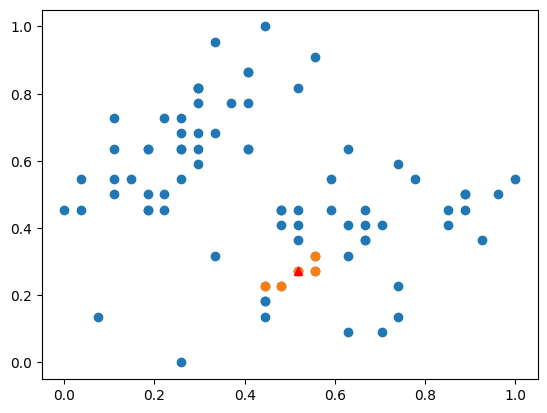

In [147]:
### 시각화

plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1]) # 스케일링된 x_train
plt.scatter(k_length, k_width)
plt.plot(new_iris_scaled[0,0], new_iris_scaled[0,1], 'r^')
plt.show()